In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import missingno as msno
from datetime import timedelta

In [2]:
df = pd.read_csv('weather_data.csv', parse_dates=['date'])
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (311, 7)

First 5 rows:
        date  avg_temperature   humidity  avg_wind_speed rain_or_not  \
0 2023-01-01        23.745401  46.140905        7.845981        Rain   
1 2023-01-02        30.030503  59.876587        5.382457        Rain   
2 2023-01-03        28.365224  51.464618       13.158008        Rain   
3 2023-01-04        27.550929  53.103799        5.886677        Rain   
4 2023-01-05        23.639303  57.826186       12.248992        Rain   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  296 non-null    float64       
 2   humidity    

In [3]:
print("\nMissing values in each column:")
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Value Patterns')
plt.savefig('missing_values.png')
plt.close()


Missing values in each column:
date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


<Figure size 1000x600 with 0 Axes>

Dataset Shape: (311, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  296 non-null    float64       
 2   humidity         296 non-null    float64       
 3   avg_wind_speed   296 non-null    float64       
 4   rain_or_not      311 non-null    object        
 5   cloud_cover      296 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.1+ KB

Basic Statistics:
                      date  avg_temperature    humidity  avg_wind_speed  \
count                  311       296.000000  296.000000      296.000000   
mean   2023-06-05 00:00:00        25.983840   55.041385        7.556636   
min    2023-01-01 00:00:00        15.000000   30.000000        0

C:\Users\Thevindu Kalubowila\AppData\Local\Temp\ipykernel_36952\2906958126.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_df = pd.read_csv('weather_data.csv',


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


C:\Users\Thevindu Kalubowila\AppData\Local\Temp\ipykernel_36952\2906958126.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

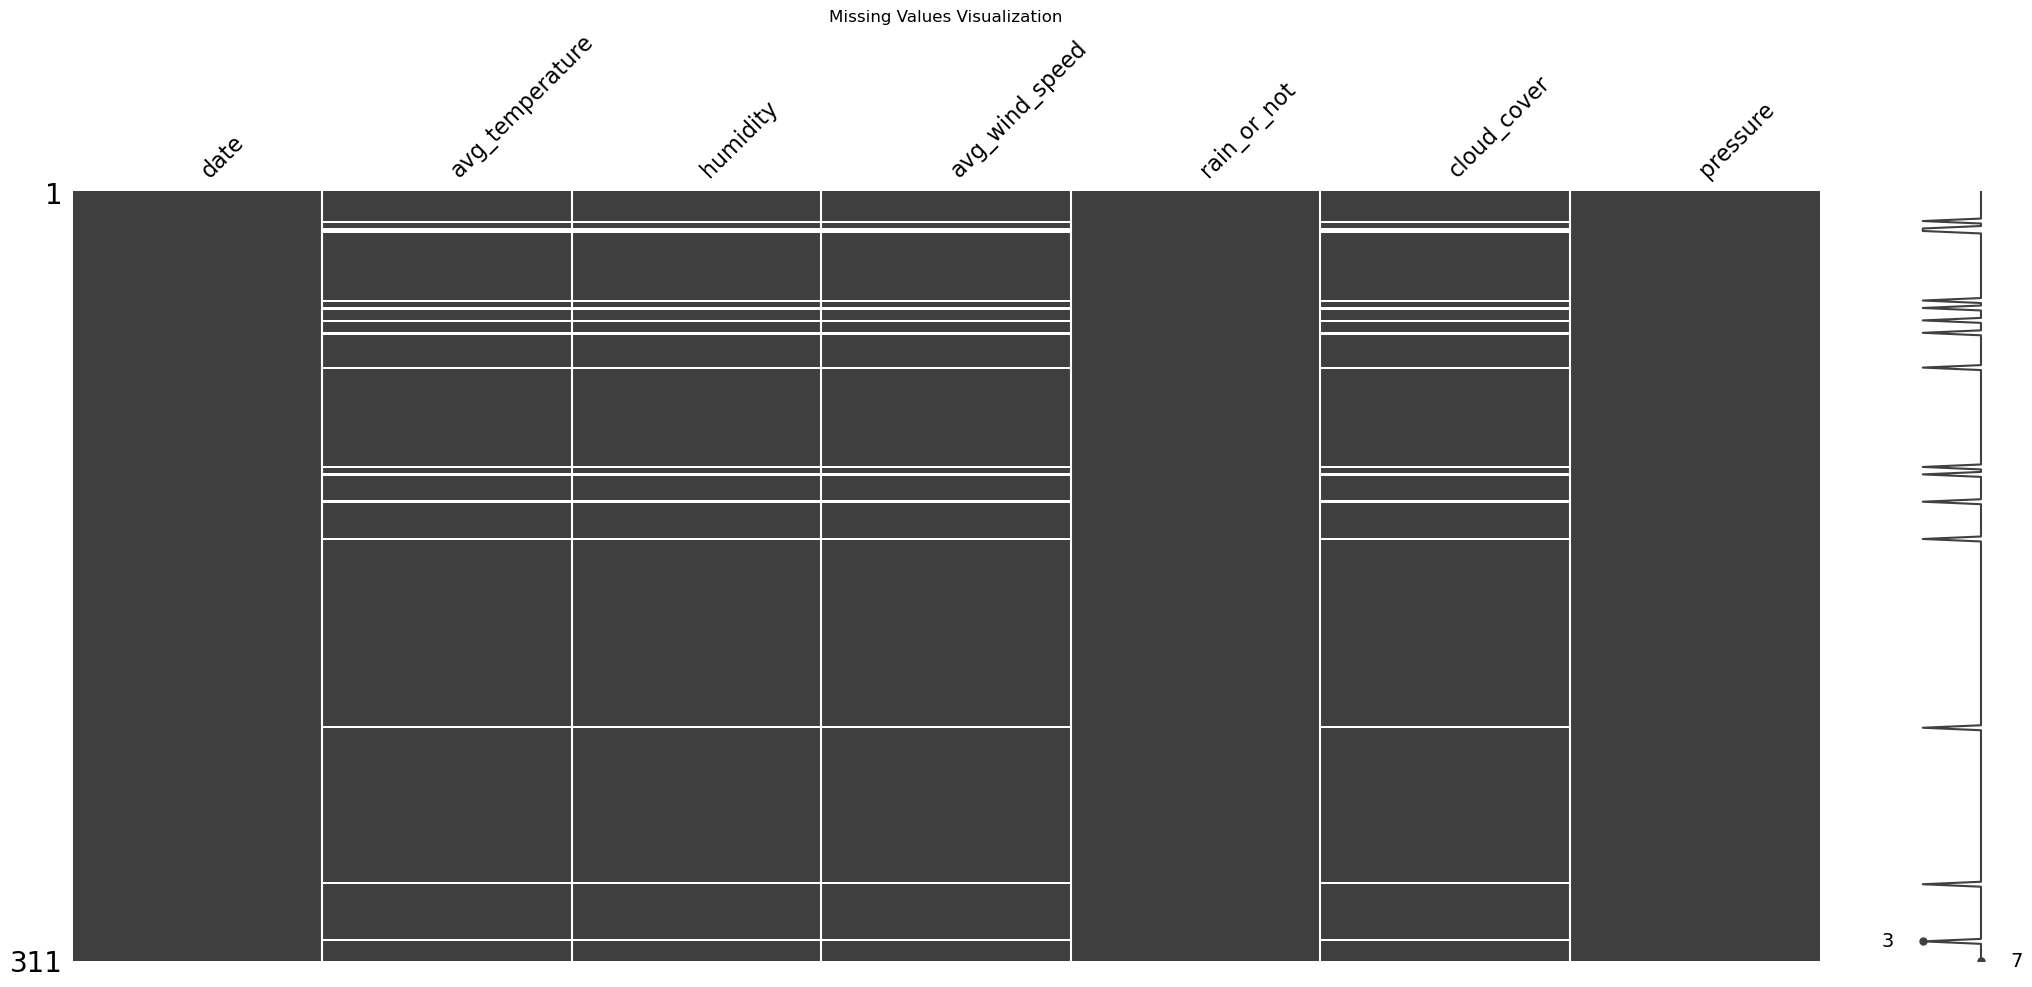

In [4]:
# Load the weather dataset with date parsing
# Replace 'path/to/weather_data.csv' with your actual file path
weather_df = pd.read_csv('weather_data.csv', 
                         parse_dates=['date'],  # Replace with actual date column name
                         infer_datetime_format=True)

# Display basic information about the dataset
print("Dataset Shape:", weather_df.shape)
print("\nDataset Info:")
weather_df.info()

# Display basic statistics
print("\nBasic Statistics:")
print(weather_df.describe())

# Check for missing values
print("\nMissing Values:")
print(weather_df.isnull().sum())

# Display first few rows
print("\nFirst 5 rows of data:")
display(weather_df.head())

# Visualize missing values using missingno
plt.figure(figsize=(10, 6))
msno.matrix(weather_df)
plt.title('Missing Values Visualization')
plt.tight_layout()
plt.show()

# Time series plot (if data contains temperature or similar measurements)
if 'temperature' in weather_df.columns:  # Replace with actual column name
    plt.figure(figsize=(12, 6))
    weather_df.set_index('date').temperature.plot()
    plt.title('Temperature Over Time')
    plt.ylabel('Temperature')
    plt.tight_layout()
    plt.show()

In [6]:
# Handle date formatting issues
# Ensure dates are in proper datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce')

# Check for NaT (Not a Time) values which indicate parsing failures
if weather_df['date'].isnull().any():
    print(f"\nFound {weather_df['date'].isnull().sum()} invalid date entries")
    # Drop rows with invalid dates or replace with neighboring dates
    weather_df = weather_df.dropna(subset=['date'])
    
# Sort by date to ensure chronological order
weather_df = weather_df.sort_values('date').reset_index(drop=True)

print("\nDate range in dataset:")
print(f"Start: {weather_df['date'].min()}, End: {weather_df['date'].max()}")

# Check for gaps in the time series
date_diff = weather_df['date'].diff().dropna()
print("\nTime intervals between records:")
print(date_diff.value_counts().sort_index().head())

# Check if we have regular daily data
is_daily = (date_diff == timedelta(days=1)).all()
print(f"\nData has regular daily intervals: {is_daily}")

# Add date components for time series analysis
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.month
weather_df['day'] = weather_df['date'].dt.day
weather_df['day_of_week'] = weather_df['date'].dt.dayofweek
weather_df['day_name'] = weather_df['date'].dt.day_name()
weather_df['is_weekend'] = weather_df['day_of_week'].isin([5, 6]).astype(int)

print("\nDate components added to dataset:")
display(weather_df[['date', 'year', 'month', 'day', 'day_name', 'is_weekend']].head())


Date range in dataset:
Start: 2023-01-01 00:00:00, End: 2023-11-07 00:00:00

Time intervals between records:
date
1 days    310
Name: count, dtype: int64

Data has regular daily intervals: True

Date components added to dataset:


,date,year,month,day,day_name,is_weekend
0,2023-01-01,2023,1,1,Sunday,1
1,2023-01-02,2023,1,2,Monday,0
2,2023-01-03,2023,1,3,Tuesday,0
3,2023-01-04,2023,1,4,Wednesday,0
4,2023-01-05,2023,1,5,Thursday,0


In [7]:
# Check for duplicate date entries
duplicates = weather_df[weather_df.duplicated(subset=['date'], keep=False)]

if len(duplicates) > 0:
    print(f"\nFound {len(duplicates)} duplicate date entries:")
    display(duplicates.sort_values('date'))
    
    # Option 1: Keep the first occurrence
    weather_df_dedup1 = weather_df.drop_duplicates(subset=['date'], keep='first')
    print(f"\nDataset size after removing duplicates (keeping first): {weather_df_dedup1.shape}")
    
    # Option 2: Average values for same dates
    weather_df_dedup2 = weather_df.groupby('date').mean(numeric_only=True).reset_index()
    
    # Restore non-numeric columns that might have been dropped during mean operation
    if 'rain_or_not' in weather_df.columns:
        # For categorical columns like 'rain_or_not', take the most common value for each date
        rain_mode = weather_df.groupby('date')['rain_or_not'].agg(lambda x: x.mode()[0]).reset_index()
        weather_df_dedup2 = weather_df_dedup2.merge(rain_mode, on='date')
    
    print(f"Dataset size after aggregating duplicates: {weather_df_dedup2.shape}")
    
    # Choose which deduplication method to use
    weather_df = weather_df_dedup1  # Change to weather_df_dedup2 if preferred
    
    print("\nChosen deduplication method: keeping first occurrence")
else:
    print("\nNo duplicate dates found in the dataset.")

# Verify there are no more duplicates
assert not weather_df.duplicated(subset=['date']).any(), "Duplicates still exist!"
print("Duplicate dates have been successfully handled.")

# Summary statistics for deduplicated data
print("\nSummary statistics after handling duplicates:")
print(weather_df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']].describe())


No duplicate dates found in the dataset.
Duplicate dates have been successfully handled.

Summary statistics after handling duplicates:
       avg_temperature    humidity  avg_wind_speed  cloud_cover     pressure
count       296.000000  296.000000      296.000000   296.000000   311.000000
mean         25.983840   55.041385        7.556636    49.834827  1001.059119
std           6.802475   19.220133        5.344683    29.009459    28.835595
min          15.000000   30.000000        0.069480     0.321826   951.240404
25%          20.265692   34.280826        3.550354    24.530951   975.757545
50%          27.177958   56.759806        7.326421    50.725120  1001.938586
75%          32.204599   72.189837       11.050627    76.046506  1026.578884
max          35.000000   90.000000       56.636041    99.834751  1049.543752
